# Introduction
As a metric, our group decided to look for bad activities and with it we would find the lowest amount of illegal activities and overall accidents.
For my dataset, I chose to look over illegal dump site activity.
The best neighborhood for this dataset is the one that has the least activity.


## About the Dataset
1. Who submitted it? Josh Feldmiller, and the link to the data is https://data.wprdc.org/dataset/allegheny-county-illegal-dump-sites
2. What is the dataset? It is a csv containing information on the illegal dump sites in different neighborhoods of Allegheny County.
3. Why is this dataset useful? It contains in depth information regarding illegal dump sites as well as how many estimated tons of illegal resources are dumped.

I start by reading in the dataset as a pandas DataFrame, and instantly convert the column containing the data I need into a column consisting of floats rather than strings.
Finally, I display the head of the data.

In [39]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

data = pd.read_csv("illegaldumpsites.csv")
data['estimated_tons'] = pd.to_numeric(data['estimated_tons'], errors='coerce')
data = data.drop(data[(data['City'] != 'Pittsburgh')].index)
data.head()

,site_name,Status,City,Neighborhood,estimated_tons,location_description,latitude,longitude,Unnamed: 8
0,St. Martin Street,Surveyed,Pittsburgh,Allentown,0.5,NaN,40.42221971,-79.99022525,NaN
1,Brosville Street,Surveyed,Pittsburgh,Allentown,3.0,NaN,40.42370101,-79.98657393,NaN
2,McCain Street,Surveyed,Pittsburgh,Allentown,1.0,NaN,40.42427063,-79.99022675,NaN
3,Ceres Way,Surveyed,Pittsburgh,Allentown,0.5,NaN,40.42327242,-79.99248958,NaN
4,Eureka Street,Completed,Pittsburgh,Allentown,0.1,NaN,40.42372131,-79.99478912,NaN


I then simplify the data into only showing the estimated tons dumped illegally and the neighborhoods so I can make a comparison.

In [42]:
neighborhoods = pd.DataFrame(columns=["Neighborhood", "Tons"])
neighborhoods["Neighborhood"] = data["Neighborhood"]
neighborhoods["Tons"] = data["estimated_tons"]

neighborhoods.head(25)

,Neighborhood,Tons
0,Allentown,0.5
1,Allentown,3.0
2,Allentown,1.0
3,Allentown,0.5
4,Allentown,0.1
5,Allentown,5.0
6,Allentown,0.3
7,Arlington,3.0
8,Arlington,4.0
9,Arlington,2.5


I take the simplified dataset and group the neighborhoods by those that have the same name and take the sum of the estimated amount illegally dumped for each neighborhood.
Since it has some unknown values I drop those since they are not actual neighborhoods.

In [43]:
neighborhoods = neighborhoods.groupby('Neighborhood').sum()

In [53]:
neighborhoods_sorted = neighborhoods.sort_values("Tons", ascending=True)
#newData = neighborhoods_sorted.drop(index = ['Partially', 'To Be Determined'])
neighborhoods_sorted.head(30)

,Tons
Neighborhood,
Springdale,0.0
East Liberty,0.0
Strip District,0.3
Point Breeze North,0.3
Homewood West,0.5
Banksville,1.0
Bedford Dwellings,1.0
West Wood,1.0
Bluff,1.0


Finally, I create a bar chart showing the data sorted in ascending order.
This chart shows the neighborhoods with the lowest amount of illegally dumped items.

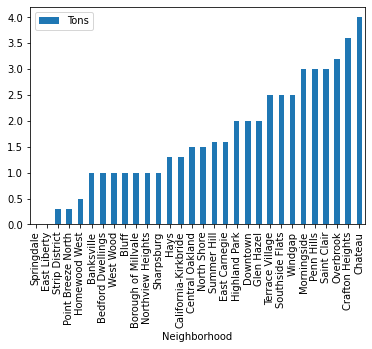

In [48]:
neighborhoods_sorted.iloc[:30].plot(kind='bar')

Through this data, I find that the lowest amount of trash dumped is in East Liberty, followed by the Strip District.

In [59]:
n2 = neighborhoods_sorted.query("Neighborhood == 'Saint Clair'")
n2.head()

,Tons
Neighborhood,
Saint Clair,3.0


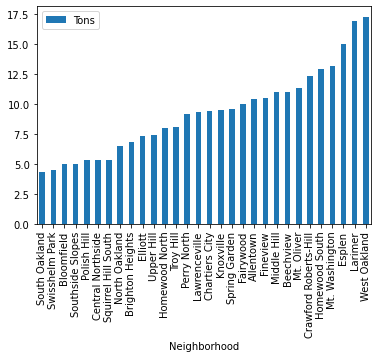

In [52]:
neighborhoods_sorted.iloc[30:60].plot(kind='bar')

In conclusion, by going through the data regarding Illegal Dumping in Pittsburgh, I have decided that East Liberty is overall the best place for a business to be established with the Strip District coming second.

This makes sense since overall the Strip District is a place in which lots of businesses can be found since it allows for lots of people to walk around and find what they are looking for while allowing businesses to thrive since they can continue to bring in customers.